<a href="https://colab.research.google.com/github/WilsonG08/DEEP-LEARNING/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Librerias
from tensorflow.python.framework.func_graph import flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import tensorflow as tf
import cv2 as cv
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import keras


Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.4923 - accuracy: 0.8277
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3205 - accuracy: 0.8874
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2834 - accuracy: 0.8998
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2564 - accuracy: 0.9084
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 0.8981
La función de perdida es:  0.28276515007019043
La precision es:  0.8981000185012817
1/1 [==============================] - 0s 57ms/step
La imagen se clasifica como: 9


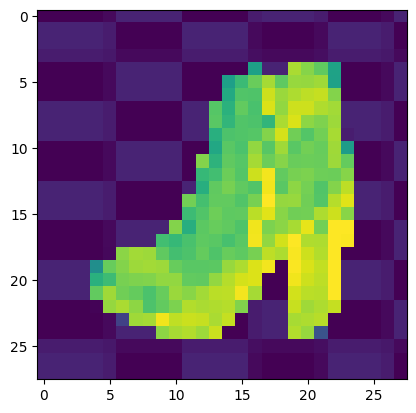

In [43]:
#CARGAR DATOS DE ENTRENAMIENTO Y PRUEBA
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


#forma de las imagenes 28 x 28 pixeles  (60000 imagenes)
x_train.shape


#PREPARAR LOS DATOS
#estandarizar los valores entre 0 y 1 pixeles(0 y 255)
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
#cambiar forma de los datos de entrada, -1: establecer automaticamente la dimension, a 28*28 y a blanco /negro último (1) color (3)
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


#CREAR ARQUITECTURA DE LA RED NEURONAL CONVOLUCIONAL
#capa convolucion(#filtros, kernel,fun actvación, forma entrada)
capa_convolucion=Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))
#capa agrupamiento (pool_size=(2,2))cada región de 2x2 píxeles en la entrada se reduce a un solo píxe
capa_agrupamiento=MaxPooling2D(pool_size=(2,2))
#capa aplanamiento
capa_aplanamiento=Flatten()
#capas Densas (escondidas)
capa_oculta=Dense(units=64,activation="relu")
#capa Salida
capa_salida=Dense(units=10,activation="softmax")

modelo= keras.Sequential([capa_convolucion,capa_agrupamiento,capa_aplanamiento,capa_oculta,capa_salida])


#Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])

#pasar a categoricas (10 salidas)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#entrenar el modelo
modelo.fit(x_train, y_train, batch_size=128, epochs=5)



#EVALUAR EL MODELO CON LOS DATOS DE PRUEBA
perdida= modelo.evaluate(x_test,y_test)
print("La función de perdida es: ",perdida[0])
print("La precision es: ",perdida[1])


# ======

#leer imagen
imagen = cv.imread('tacos.png', cv.IMREAD_GRAYSCALE)

# Aplicar un filtro de desenfoque  GaussianBlur(imagen,kernel,desv_estandar)
imagen = cv.GaussianBlur(imagen, (3, 3), 0)

# Convertir a escala de grises
#imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# Redimensionar las imágenes a un tamaño de 28 x 28
imagen = cv.resize(imagen,(28,28),interpolation=cv.INTER_NEAREST)

# Aplicar la inversión de colores (intensidad de gris)
imagen = cv.bitwise_not(imagen)

# Normalizar los píxeles al rango [0, 1]
imagen = imagen.astype("float32") / 255

# Mostrar la imagen
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color (escala de grises)
#-1 se utiliza para indicar la posición en la que se debe agregar la nueva dimensión.
imagen = np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imágenes
#El valor 0 se refiere al primer eje del arreglo
imagen = np.expand_dims(imagen, axis=0)

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
print('La imagen se clasifica como:', predicted_class)